In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import statsmodels.api as sm

In [2]:
# set random seed for reproducibility
np.random.seed(4300) # for STK-IN4300

In [3]:
# import csv https://archive.ics.uci.edu/ml/machine-learning-databases/00505/qsar_aquatic_toxicity.csv
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00505/qsar_aquatic_toxicity.csv', sep=';', header=None)

In [4]:
columns = ["TPSA", "SAacc", "H050", "MLOGP", "RDCHI", "GATS1p", "nN", "C040", "LC50"]

In [5]:
# add column names
data.columns = columns
data

,TPSA,SAacc,H050,MLOGP,RDCHI,GATS1p,nN,C040,LC50
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


In [6]:
# find out which are continuous and which are categorical
data.dtypes

TPSA      float64
SAacc     float64
H050        int64
MLOGP     float64
RDCHI     float64
GATS1p    float64
nN          int64
C040        int64
LC50      float64
dtype: object

In [7]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [8]:
def simple_linreg(df):
    X = df.drop(columns=['LC50'])
    y = df['LC50']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    model = sm.OLS(y_train, X_train_const).fit()

    y_pred_train = model.predict(X_train_const)
    y_pred_test = model.predict(X_test_const)

    train_error = mse(y_train, y_pred_train)
    test_error = mse(y_test, y_pred_test)

    summary = model.summary()

    return train_error, test_error, summary

In [9]:
# with one hot encoding
df_onehot = pd.get_dummies(data, columns=["H050", "nN", "C040"])
print("With one hot encoding:")
train_error1, test_error1, summary1  = simple_linreg(df_onehot)
print(f"Train error: {train_error1}")
print(f"Test error: {test_error1}")
print(summary1)

With one hot encoding:
Train error: 1.3157359948856746
Test error: 1.5258506386707191
                            OLS Regression Results                            
Dep. Variable:                   LC50   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     14.92
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           6.99e-41
Time:                        14:41:01   Log-Likelihood:                -567.99
No. Observations:                 365   AIC:                             1188.
Df Residuals:                     339   BIC:                             1289.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [10]:
# without one hot encoding
df_nohot = data.copy()
print("\nWithout one hot encoding:")
train_error2, test_error2, summary2 = simple_linreg(df_nohot)
print(f"Train error: {train_error2}")
print(f"Test error: {test_error2}")
print(summary2)


Without one hot encoding:
Train error: 1.4060307014296685
Test error: 1.479358102957687
                            OLS Regression Results                            
Dep. Variable:                   LC50   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     43.00
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           6.37e-48
Time:                        14:41:01   Log-Likelihood:                -580.10
No. Observations:                 365   AIC:                             1178.
Df Residuals:                     356   BIC:                             1213.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [11]:
# repeat 200 times 
def repeat_simple_linreg(df1, n=200):
    train_errors = []
    test_errors = []

    for i in range(n):
        train_error, test_error, _ = simple_linreg(df1)
        train_errors.append(train_error)
        test_errors.append(test_error)

    return train_errors, test_errors
        

In [12]:
train_errors_onehot, test_errors_onehot = repeat_simple_linreg(df_onehot)
train_errors_nohot, test_errors_nohot = repeat_simple_linreg(df_nohot)

In [13]:
# look at mean and std of train and test errors
def print_stats(train_errors, test_errors):
    print(f"Average train error: {np.mean(train_errors):.3f}")
    print(f"Average test error: {np.mean(test_errors):.3f}")
    print(f"Train error std: {np.std(train_errors):.3f}")
    print(f"Test error std: {np.std(test_errors):.3f}")

In [14]:
print("With one hot encoding:")
print_stats(train_errors_onehot, test_errors_onehot)
print("\nWithout one hot encoding:")
print_stats(train_errors_nohot, test_errors_nohot)

With one hot encoding:
Average train error: 1.288
Average test error: 1.657
Train error std: 0.082
Test error std: 0.218

Without one hot encoding:
Average train error: 1.412
Average test error: 1.488
Train error std: 0.077
Test error std: 0.165


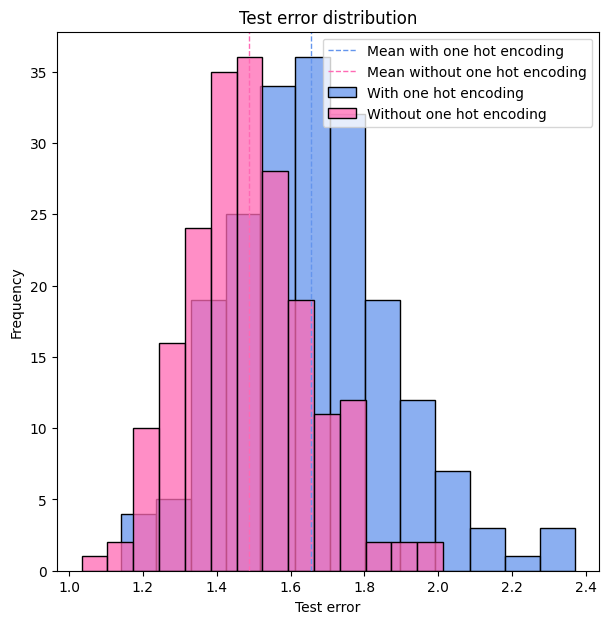

In [15]:
# make a plot of the test errors
plt.figure(figsize=(7,7))
sns.histplot(test_errors_onehot, color='cornflowerblue', label='With one hot encoding')
sns.histplot(test_errors_nohot, color='hotpink', label='Without one hot encoding')
plt.xlabel('Test error')
plt.ylabel('Frequency')
plt.title('Test error distribution')
plt.axvline(np.mean(test_errors_onehot), color='cornflowerblue', linestyle='dashed', linewidth=1, label='Mean with one hot encoding')
plt.axvline(np.mean(test_errors_nohot), color='hotpink', linestyle='dashed', linewidth=1, label='Mean without one hot encoding')
plt.legend()
plt.show()


Apply different variable selection procedures (at least backward elimination and forward selection) with different stopping criteria (at least AIC and BIC) and compare the results. Do you obtain the same model?

In [16]:
def AIC(y_true, y_pred, d):
    #-2/N *log-likelihood + 2d/N, d is measure of complexity / number of parameters
    N = len(y_true)
    loglik = np.nan # MIA: fill out
    aic = -2/N * loglik + 2 * d/N
    return aic
   
def BIC(y_true, y_pred, d):
    # -2*loglik + log(N)*d
    N = len(y_true)
    loglik = np.nan # MIA: fill out
    bic = -2 * loglik + np.log(N) * d
    return bic

In [53]:
def backward_eliminiaton(df, p_val=0.005):
    X = df.drop(columns=['LC50'])
    y = df['LC50']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    model = sm.OLS(y_train, X_train_const).fit()

    while model.pvalues.max() > p_val: # while the highest p-value is above the threshold
        drop_col = model.pvalues.idxmax() # drop the column with the highest p-value
        X_train = X_train.drop(columns=drop_col) # drop the column from the training set
        X_train_const = sm.add_constant(X_train) # add the constant again
        model = sm.OLS(y_train, X_train_const).fit() # fit the model again

    # training and test error
    # remove columns in test that are not in train
    X_test = X_test[X_train.columns]
    assert (len(X_test.columns)!=8), "No columns were removed"
    print(f"Number of columns removed: {8-len(X_test.columns)}")

    X_test_const = sm.add_constant(X_test)

    y_pred_test = model.predict(X_test_const)
    y_pred_train = model.predict(X_train_const)

    train_error = mse(y_train, y_pred_train)
    test_error = mse(y_test, y_pred_test)

    summary = model.summary()

    return train_error, test_error, summary 
    

In [54]:
train_error, test_error, summary = backward_eliminiaton(df_nohot)
print(f"Train error: {train_error}")
print(f"Test error: {test_error}")
print(summary)

Number of columns removed: 2
Train error: 1.4349811807420156
Test error: 1.4170813659466763
                            OLS Regression Results                            
Dep. Variable:                   LC50   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     52.42
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           3.50e-46
Time:                        14:45:01   Log-Likelihood:                -583.82
No. Observations:                 365   AIC:                             1182.
Df Residuals:                     358   BIC:                             1209.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [39]:
def forward_selection(df, stopping_crit):
    pass

Apply ridge regression and use both a bootstrap procedure and cross-validation (choose the number of folds you prefer) to find the optimal complexity parameter in a grid of candidate parameter values of your own choice. Provide a plot in which the results of the two procedures are contrasted and comment on them.

In [40]:
def bootstrap_samples(df, n_boot_samples = 200):
    samples = []
    for i in range(n_boot_samples):
        samples.append(df.sample(frac=1, replace=True))

    return samples

In [41]:
# make split 
def split_data(df):
    X = df.drop(columns=['LC50'])
    y = df['LC50']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4300)

    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    return X_train_const, X_test_const, y_train, y_test

In [42]:
data_const = split_data(df_nohot)

In [43]:
def simple_Ridge(data_const, lmbda):

    X_train_const, X_test_const, y_train, y_test = data_const

    model = Ridge(lmbda)
    model.fit(X_train_const, y_train)

    y_pred_train = model.predict(X_train_const)
    y_pred_test = model.predict(X_test_const)

    train_error = mse(y_train, y_pred_train)
    test_error = mse(y_test, y_pred_test)

    return train_error, test_error

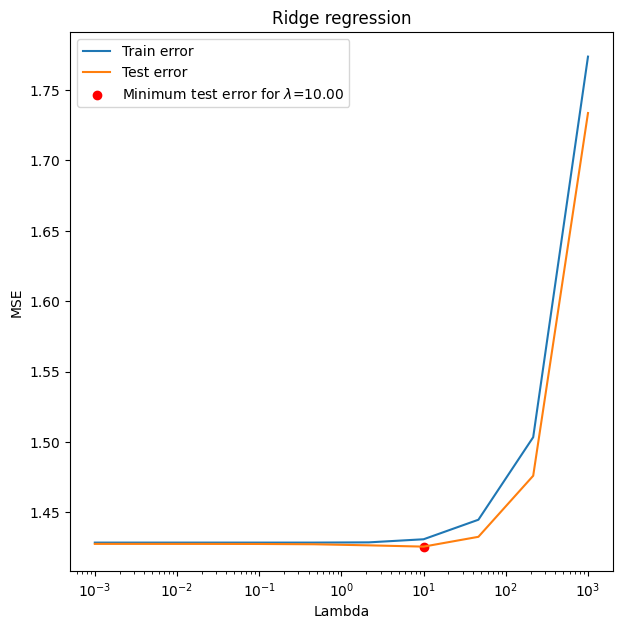

In [44]:
lmbda_values = np.logspace(-3, 3, 10)
train_errors = []
test_errors = []

for lmbda in lmbda_values:
    train_error, test_error = simple_Ridge(data_const, lmbda)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.figure(figsize=(7,7))
plt.plot(lmbda_values, train_errors, label='Train error')
plt.plot(lmbda_values, test_errors, label='Test error')
min_test_error = min(test_errors)
min_test_error_idx = test_errors.index(min_test_error)
plt.scatter(lmbda_values[min_test_error_idx], min_test_error, color='red', label=fr'Minimum test error for $\lambda$={lmbda_values[min_test_error_idx]:.2f}')
plt.xlabel('Lambda')
plt.xscale('log')  
plt.ylabel('MSE')
plt.title('Ridge regression')
plt.legend()
plt.show()

MIA: this is fishy, high value....

In [45]:
def bootstrap_Ridge(boot_samples, lmbda):
    train_errors = []
    test_errors = []

    for sample in boot_samples:
        data_const = split_data(sample)
        train_error, test_error = simple_Ridge(data_const, lmbda)
        train_errors.append(train_error)
        test_errors.append(test_error)

    return train_errors, test_errors

100%|██████████| 10/10 [00:02<00:00,  3.37it/s]


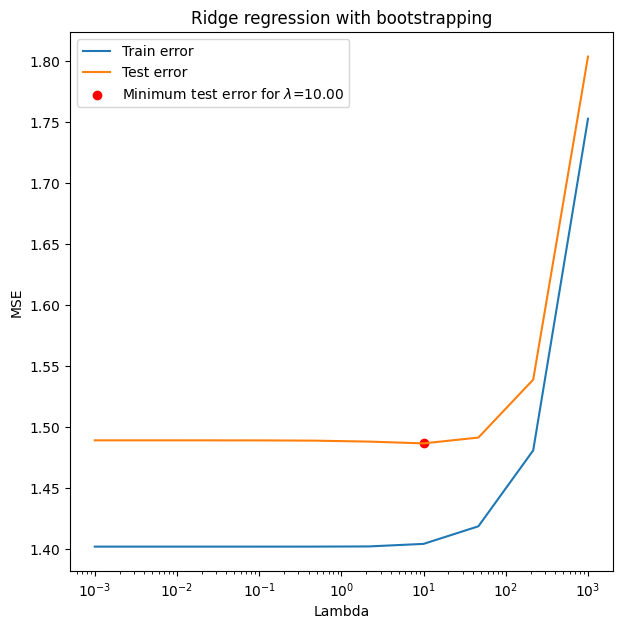

In [46]:
boot_samples = bootstrap_samples(df_nohot, n_boot_samples=100)

sum_train_errors = []
sum_test_errors = []

for lmbda in tqdm(lmbda_values): 
    train_errors, test_errors = bootstrap_Ridge(boot_samples, lmbda)
    sum_train_errors.append(np.mean(train_errors))
    sum_test_errors.append(np.mean(test_errors))

min_test_error = min(sum_test_errors)
min_test_error_idx = sum_test_errors.index(min_test_error)
optimal_lambda = lmbda_values[min_test_error_idx]

plt.figure(figsize=(7,7))
plt.plot(lmbda_values, sum_train_errors, label='Train error')
plt.plot(lmbda_values, sum_test_errors, label='Test error')
plt.scatter(optimal_lambda, min_test_error, color='red', label=fr'Minimum test error for $\lambda$={optimal_lambda:.2f}')
plt.xlabel('Lambda')
plt.xscale('log')
plt.ylabel('MSE')
plt.title('Ridge regression with bootstrapping')
plt.legend()
plt.show()


In [47]:
def Ridge_CV(df, lmbda, k_folds = 5):
    
    train_errors = []
    test_errors = []
    
    folds = np.array_split(df, k_folds)
    
    for i in range(k_folds):   
        # concat all but the i-th fold
        X = pd.concat([fold for j, fold in enumerate(folds) if j != i])
        y = X['LC50']

        model = Ridge(lmbda)
        model.fit(X, y)

        y_pred_train = model.predict(X)
        y_pred_test = model.predict(folds[i])

        train_error = mse(y, y_pred_train)
        test_error = mse(folds[i]['LC50'], y_pred_test)

        train_errors.append(train_error)
        test_errors.append(test_error)
        
    return train_errors, test_errors


100%|██████████| 100/100 [00:00<00:00, 375.75it/s]


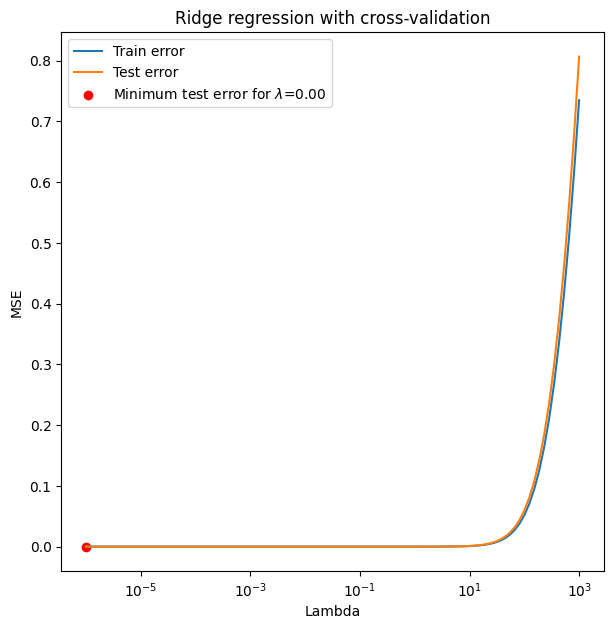

In [48]:
sum_train_errors = []
sum_test_errors = []
lmbda_values = np.logspace(-6, 3, 100)

for lmbda in tqdm(lmbda_values):
    train_errors, test_errors = Ridge_CV(df_nohot, lmbda, k_folds = 2)
    sum_train_errors.append(np.mean(train_errors))
    sum_test_errors.append(np.mean(test_errors))

#finf the lambda that gives the lowest test error
min_test_error = min(sum_test_errors)
min_test_error_idx = sum_test_errors.index(min_test_error)
optimal_lambda = lmbda_values[min_test_error_idx]

plt.figure(figsize=(7,7))
plt.plot(lmbda_values, sum_train_errors, label='Train error')
plt.plot(lmbda_values, sum_test_errors, label='Test error')
plt.scatter(optimal_lambda, min_test_error, color='red', label=fr'Minimum test error for $\lambda$={optimal_lambda:.2f}')
plt.xlabel('Lambda')
plt.xscale('log')
plt.ylabel('MSE')
plt.title('Ridge regression with cross-validation')
plt.legend()
plt.show()